<a href="https://colab.research.google.com/github/BSAkash/IG-SRL/blob/Akash/SRL/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Installations**##

In [ ]:
!pip install allennlp allennlp-models
!pip install --upgrade joblib
!pip install --upgrade tbb
!pip install stanza
!pip install jsonlines
!pip install jiwer
!pip install spacy[transformers]
!python -m spacy download en_core_web_sm
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.5/464.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 27.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 34.4 MB/s eta 0:00:00
  Preparing metad

##**Libraries**##

In [ ]:
import os, sys
import torch
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import random
np.random.seed(0)
random.seed(0)

import nltk
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize

import ast
import itertools
from tqdm import tqdm
tqdm.pandas()
import itertools
import json

import re
import stanza
stanza.download('en')
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,ner,depparse',use_gpu=True)
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english")
import string
import jiwer

import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel


from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
from sentence_transformers import SentenceTransformer, CrossEncoder, util, models
cross_encoder = CrossEncoder('cross-encoder/stsb-distilroberta-base',device=None)
entail_encoder = CrossEncoder('cross-encoder/nli-distilroberta-base',device=None)

# sentence-transformers/all-mpnet-base-v2
word_embedding_model = SentenceTransformer('flax-sentence-embeddings/stackoverflow_mpnet-base',device=None)

import math
from scipy.spatial import distance
from scipy.signal import find_peaks
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (11.7,8.27)
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

main_arguments = ['ARG' + str(idx) for idx in range(6)]
# !pip install bertopic
# from bertopic import BERTopic
# from hdbscan import HDBSCAN
# from umap import UMAP

from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging
from datetime import datetime
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| ner       | ontonotes |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/148 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/701 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/133 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

##**Extract Predicate Arguments**##

In [ ]:
#Download AllenAI model
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/structured-prediction-srl-bert.2020.12.15.tar.gz",cuda_device=torch.cuda.current_device())
#SRL arguments of interest
arg_types = ['ARGM-GOL','ARGM-COM','ARGM-NEG','ARGM-MOD','ARGM-DIR','ARGM-LOC','ARGM-MNR','ARGM-TMP','ARGM-ADV','ARGM-PRP','ARGM-ADJ','ARGM-LVB','ARGM-CAU' ,
             'ARGM-PNC','ARGM-EXT','ARGM-REC','ARGM-PRD','ARGM-DIS','ARGM-DSP','ARGM-RLC','ARG0','ARG1','ARG2','ARG3','ARG4','ARG5','ARG6','V']
predictor._model = predictor._model.cuda()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Output()

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##**Class & Methods**##

In [ ]:
class SRL:
  def __init__(self, value):
        self.value = value

  #pass list of sentences as [{'sentence':...},{'sentence':...}]
  def srl_arg(self, sentences):
    parsed = predictor.predict_batch_json(
        sentences
    )
    outcome = dict()
    for sentence,parse in zip(sentences,parsed):
      sentence = sentence['sentence']
      verb_list = []
      for elem in parse['verbs']:
        parsed_items = dict()
        for item in arg_types:
          arg_found = re.findall("\[{}: (.*?)]".format(item), elem['description'])
          if len(arg_found) : parsed_items[item] = arg_found
        if bool(parsed_items): verb_list.append(parsed_items)
      outcome[sentence] = verb_list
    return outcome

  #read emails
  def parse2rule(self, text_surr, parsed):
    phrases, order = [],[]

    try: parsed['V']
    except: return
    # check for coresets (ARG-1/ARG-0)
    if any(elem in main_arguments for elem in list(parsed.keys())):
      # print(valid)
      for k in arg_types:

        try: args = parsed[k]
        except: continue
        for v in args:
          # search argument position in original sentence

          query = "".join([elem for elem in v.lower() if elem.isalpha()])
          # print(text_surr,query)
          found = [m.start() for m in re.finditer(query,text_surr)]
          if found:
            try: found_ = [elem for elem in found if elem in range(min(order),max(order))][0]
            except: found_ = found[0]
            order.append(found_);phrases.append(v)

      # rearrange in relative order
      constructed = [x for _,x in sorted(zip(order,phrases))]
      return " ".join(constructed)

  def convert_time(self, x):
    try:
      datetime.strptime(x.split()[0], '%Y-%m-%d')
      return datetime.fromisoformat(x.split()[0])
    except: return np.nan

  ##identify communicator roles in email

  def process_(self, text):
    text = text.replace("\r\n"," ").replace("\n"," ")
    text = re.sub('podling', 'project', text,flags=re.IGNORECASE)
    regex = r'\b(\w+)(?:\W+\1\b)+'
    text = re.sub(regex, r'\1', text, flags=re.IGNORECASE)
    return text.lower()

  def create_clauses(self, x):
    clauses = []
    # all frames parsed in a sentence
    for key,item in x['srl_parsed'].items():

      # verb frames per sentence
      text = "".join([elem for elem in key.lower() if elem.isalpha()])

      # No of non-overlapping valid frames
      verb_toks = item.copy()

      for parsed in item:
        try: action = parsed['V'][0].lower().strip()
        except: continue

        flag = False
        for parsed_ in item:
          if parsed_ != parsed:
            for k,v in parsed_.items():
              if any(action in argument.lower().split() and k != 'V' for argument in v):
                try: verb_toks.remove(parsed);flag=True
                except: pass
          if flag : break

      if item and not verb_toks: verb_toks = item.copy()

      flag = False
      # parse every verb frame per sentence
      for parsed in verb_toks:
        parsed = {k:[v] if not isinstance(v,list) else v for k,v in parsed.items()}
        rule = self.parse2rule(text,parsed)
        if rule : clauses.append(rule);flag = True
      # if not flag : clauses.append(key)

    # remove overlapping clauses
    all_clauses = []
    for clause in clauses:
      if all(clause not in elem or clause == elem for elem in clauses) : all_clauses.append(clause)
    return all_clauses

  def inference_processing(self, data):
    data['sentences'] = data['policy.statement'].apply(lambda x: [sentence.text for sentence in nlp(x).sentences])
    data['srl_ip'] = data['sentences'].apply(lambda x: [{'sentence': elem} for elem in x])
    data['srl_parsed'] = data['srl_ip'].apply(lambda x: self.srl_arg(x))
    data['parsed_clauses'] = data.apply(lambda x: self.create_clauses(x), axis=1)
    data.to_csv('asf_clauses.csv', index=False)
    # Load the DataFrame
    rules_data = pd.read_csv('asf_clauses.csv')
    rules_data['parsed_clauses'] = rules_data['parsed_clauses'].apply(lambda x: ast.literal_eval(x))
    rules_data['label'] = rules_data.index.tolist()
    rules_data = rules_data.explode('parsed_clauses')
    rules_data.dropna(inplace=True)
    print('All parsed rules: ', rules_data.shape[0])
    rules = rules_data['parsed_clauses'].tolist()
    rules = list(map(lambda x: self.process_(x), rules))
    return rules_data.shape[0]

#############################################################################################################################################
                                          ### SIDDIKI'S METHODS START FROM BELOW ###
#############################################################################################################################################

  #read a file and apply preprocessing
  def file_read(self,file_name):
    data = pd.read_csv(file_name);print(data.columns)
    data.dropna(subset=['aIm'],inplace=True)
    data.fillna('', inplace=True)

    data['sentences'] = data['Raw Institutional Statement'].apply(lambda x : [sentence.text for sentence in nlp(x).sentences])
    data = data.explode('sentences')

    #find root verb through stanza
    data['ROOT'] = data['sentences'].apply(lambda x : [word.text for sent in nlp(x).sentences for word in sent.words  if word.deprel == 'root'][0])
    data['srl_ip'] = data['sentences'].apply(lambda x : [{'sentence' : x}])
    data['srl_parsed'] = data.apply(lambda x: self.srl_arg(x['srl_ip'])[x['sentences']],axis=1)
    data = data.explode('srl_parsed')
    print(data['srl_parsed'].head())
    return data

  #argument matching
  def argmatch(self,x,arg):
    if arg == 'Attribute_inf':
      #attribute usually found in ARG0 or ARG1
      if 'ARG0' in list(x.keys()) : return " ".join(x['ARG0'])
      elif 'ARG1' in list(x.keys()) : return " ".join(x['ARG1'])
      else: return ""

    if arg == 'Object_inf':
      #attribute usually found in ARG0 or ARG1
      if 'ARG0' in list(x.keys()):
        if 'ARG1' in list(x.keys()) : return " ".join(x['ARG1'])
        elif 'ARG2' in list(x.keys()) : return " ".join(x['ARG2'])
        else: return ""

      else:
        if 'ARG2' in list(x.keys()) : return " ".join(x['ARG2'])
        else: return ""

    if arg == 'Aim_inf': return " ".join(x['V'])


    if arg == 'Deontic_inf':
        if 'ARGM-MOD' in list(x.keys()) : return " ".join(x['ARGM-MOD'])
        else: return ""

  # normalize the texts
  def normalize_text(self,s):
      """Removing articles and punctuation, and standardizing whitespace are all typical text processing steps."""
      import string, re

      def remove_articles(text):
          regex = re.compile(r"\b(a|an|the)\b", re.UNICODE)
          return re.sub(regex, " ", text)

      def white_space_fix(text):
          return " ".join(text.split())

      def remove_punc(text):
          exclude = set(string.punctuation)
          return "".join(ch for ch in text if ch not in exclude)

      def lower(text):
          return text.lower().strip()

      return white_space_fix(remove_articles(remove_punc(lower(s))))

  def compute_exact_match(self,prediction, truth):
      return int(self.normalize_text(prediction) == self.normalize_text(truth))

  #F1 score computation
  def compute_f1(self,truth, prediction):
      pred_tokens = self.normalize_text(prediction).split()
      truth_tokens = self.normalize_text(truth).split()
      # print(pred_tokens,truth_tokens)

      # if either the prediction or the truth is no-answer then f1 = 1 if they agree, 0 otherwise
      if len(pred_tokens) == 0 or len(truth_tokens) == 0:
          return int(pred_tokens == truth_tokens)

      common_tokens = set(pred_tokens) & set(truth_tokens)

      # if there are no common tokens then f1 = 0
      if len(common_tokens) == 0:
          return 0

      prec = len(common_tokens) / len(pred_tokens)
      rec = len(common_tokens) / len(truth_tokens)

      return 2 * (prec * rec) / (prec + rec)

  def siddiki_eval(self):
    data1 = []
    data2 = []
    data3 = []
    data4 = []

    file_names = ["FPC_Siddiki.xlsx - Camden Food Security.csv",
                  "FPC_Siddiki.xlsx - Colorado Food Systems Advisory.csv","FPC_Siddiki.xlsx - Connecticut Food Policy.csv",
                  "FPC_Siddiki.xlsx - Denver Sustainable FPC.csv", "FPC_Siddiki.xlsx - Douglas County FPC.csv", "FPC_Siddiki.xlsx - Grant County FPC.csv",
                  "FPC_Siddiki.xlsx - Homegrown Minneapolis Council.csv",
                  "FPC_Siddiki.xlsx - Knoxville Knox County.csv", "FPC_Siddiki.xlsx - Louisville FPC.csv","FPC_Siddiki.xlsx - Mass FPC.csv",
                  "FPC_Siddiki.xlsx - Michigan FPC.csv", "FPC_Siddiki.xlsx - Nashville FPC.csv", "FPC_Siddiki.xlsx - New Haven FPC.csv",
                  "FPC_Siddiki.xlsx - New Orleans Food Advisory.csv",
                  "FPC_Siddiki.xlsx - Rio Arriba County.csv", "FPC_Siddiki.xlsx - Saint Paul Ramsey.csv", "FPC_Siddiki.xlsx - San Francisco FPC.csv",
                  "ColoradoAquacultureRegulations_Siddiki.xlsx - CAA Rules.csv", "ColoradoAquacultureRegulations_Siddiki.xlsx - CAA Statute.csv",
                  "ColoradoAquacultureRegulations_Siddiki.xlsx - Fish Health Board.csv"]

    for file_name in file_names:
      data = self.file_read(file_name)
      data.dropna(subset=['srl_parsed'],inplace=True)
      for arg in ['Attribute_inf','Object_inf','Aim_inf','Deontic_inf']:
        data[arg] = data['srl_parsed'].apply( lambda x : self.argmatch(x,arg))


      data.columns = map(str.lower, data.columns)
      column_names = ['attribute', 'object', 'deontic', 'aim']
      for col_name in column_names:
          pattern = r'\[[^\]]*\]'
          data[col_name] = data[col_name].apply(lambda x : re.sub("[\(\[].*?[\)\]]", "",x))
          data[col_name] = data[col_name].apply(lambda x : x.lower().strip())

      #only keep frame parsed for root verbs
      data = data[(data['root'] == data['aim_inf']) & (data['root'] != '')]
      data = data[['raw institutional statement','attribute','deontic','aim','object','attribute_inf','deontic_inf','aim_inf','object_inf']]
      data.to_csv(f"{file_name}_data_new.csv",index=False)
      # data.head(3)
      df1 = pd.read_csv(f"{file_name}_data_new.csv")
      df1.columns = map(str.lower, df1.columns)

      column_names = ['attribute', 'object', 'deontic', 'aim']

      for col_name in column_names:
          values1 = df1[col_name].tolist()
          values2 = df1[col_name + '_inf'].tolist()

          #do we need to compare missing entries?
          values1 = [str(x).replace('nan', '') for x in values1]
          values2 = [str(x).replace('nan', '') for x in values2]

          f1_score = []
          for x,y in zip(values1,values2):
            f1_score.append((self.compute_f1(x,y)))
          print(f" F1 score for {col_name}: {np.mean(f1_score)}")
          if col_name == 'attribute':
            data1.append(np.mean(f1_score))
          if col_name == 'object':
            data2.append(np.mean(f1_score))
          if col_name == 'deontic':
            data3.append(np.mean(f1_score))
          if col_name == 'aim':
            data4.append(np.mean(f1_score))
    return data1, data2, data3, data4

  def boxPlots(self, data1, data2, data3, data4):
    # Create a 2x2 subplot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    # Plot each boxplot in a different subplot
    axes[0, 0].boxplot(data1)
    axes[0, 0].set_title("Boxplot for Attribute")

    axes[0, 1].boxplot(data2)
    axes[0, 1].set_title("Boxplot for Object")

    axes[1, 0].boxplot(data3)
    axes[1, 0].set_title("Boxplot for Deontic")

    axes[1, 1].boxplot(data4)
    axes[1, 1].set_title("Boxplot for Aim")

    # Add overall title to the entire figure
    fig.suptitle("Boxplots")

    # Adjust layout to prevent overlapping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()


##**Processing**##

In [ ]:
instance = SRL(value=None)

In [ ]:
# Generate rules from policies
try: f = open("/content/anamika_os.csv")
except:
  os.system('wget https://storage.googleapis.com/cscw_2022/anamika_os.csv')
data = pd.read_csv("/content/anamika_os.csv");print(data.columns)

instance.inference_processing(data)

Index(['policy.doc.name', 'section.name', 'policy.statement'], dtype='object')
All parsed rules:  423


423

In [ ]:
data1, data2, data3, data4 = instance.siddiki_eval()

Index(['Raw Institutional Statement', 'Attribute', 'Deontic', 'aIm', 'oBject',
       'Condition', 'Or else', 'Statement Type', 'Institution Type',
       'Regulative /            Constitutive', 'Level of Analysis'],
      dtype='object')
1                                     {'V': ['shall']}
1                                        {'V': ['be']}
1    {'ARGM-MOD': ['shall'], 'ARG1': ['The voting m...
2                                     {'V': ['shall']}
2                                        {'V': ['be']}
Name: srl_parsed, dtype: object
 F1 score for attribute: 0.6477777777777777
 F1 score for object: 0.5065215829921712
 F1 score for deontic: 1.0
 F1 score for aim: 0.7111111111111111
Index(['Raw Institutional Statement', 'Attribute', 'Deontic', 'aIm', 'oBject',
       'Condition', 'Or else', 'Statement Type', 'Institution Type',
       'Regulative /            Constitutive', 'Level of Analysis'],
      dtype='object')
1                                        {'V': ['IS']}
1    {'ARG

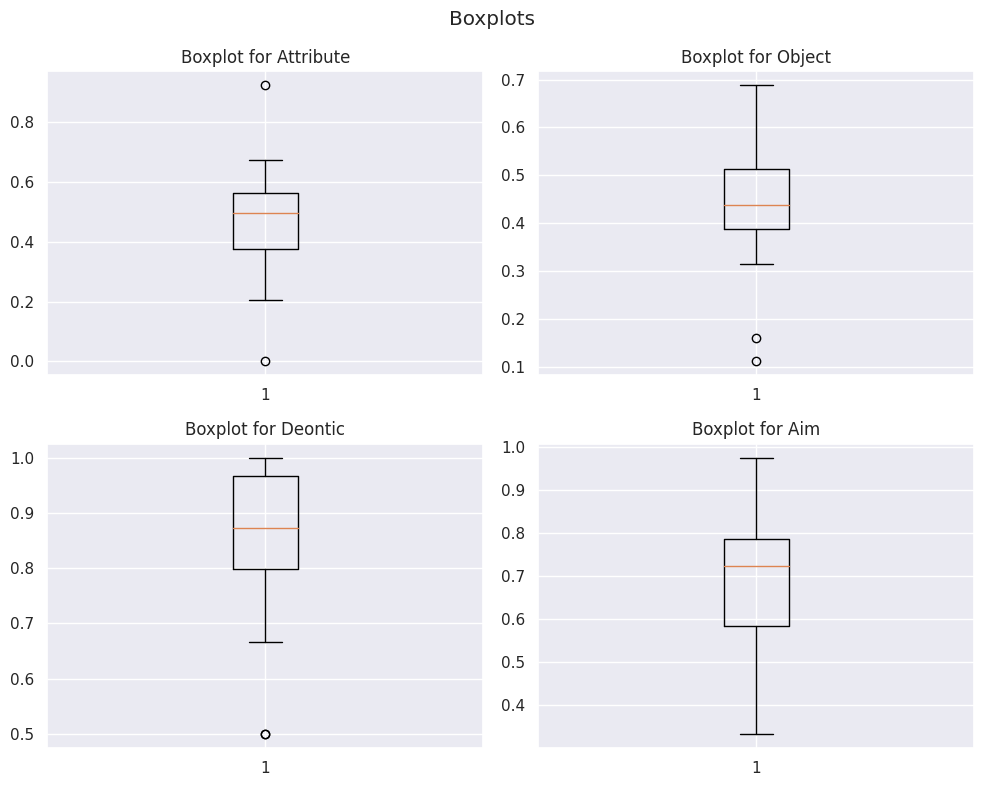

In [ ]:
instance.boxPlots(data1, data2, data3, data4)